<a href="https://colab.research.google.com/github/juii18/Project--Titanic_ML_Project/blob/main/Classification_Titanic_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1-Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
titanic_data=pd.read_csv('titanic_data.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(str(len(titanic_data.index)))

891


Step 2-Analyzing the data

<Axes: xlabel='Survived', ylabel='count'>

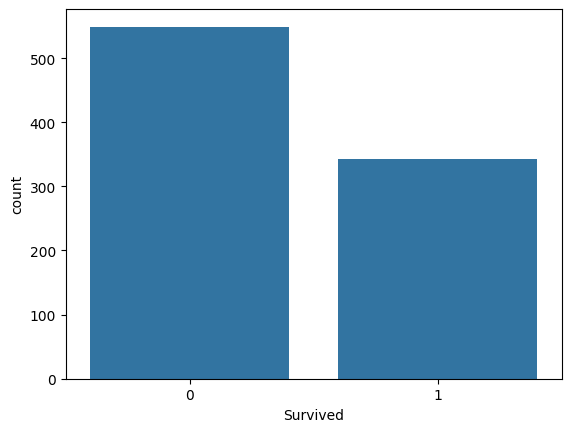

In [ ]:
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

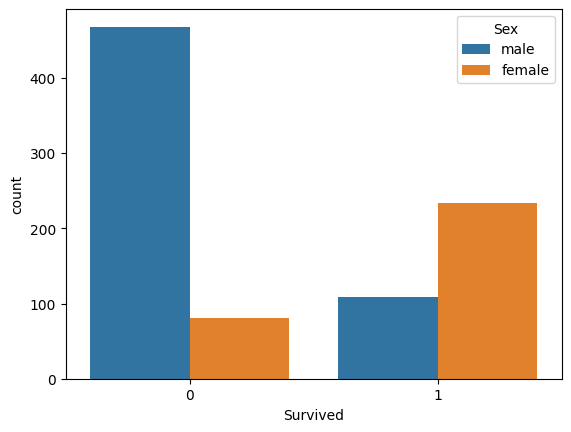

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

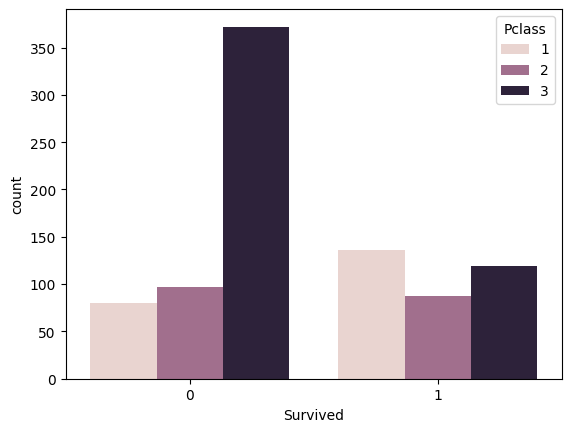

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<Axes: ylabel='Frequency'>

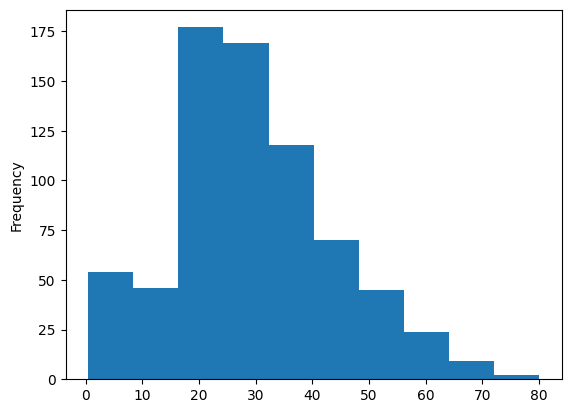

In [ ]:
titanic_data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

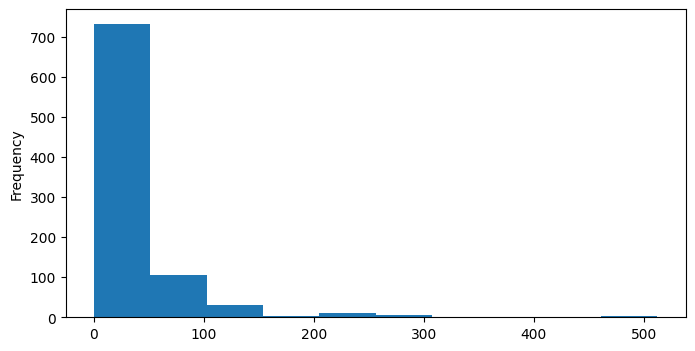

In [ ]:
titanic_data['Fare'].plot.hist(figsize=(8,4))

Step 3-Data Wrangling

In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic_data.head(2)

titanic_data.dropna(inplace=True)

titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Converting data from one form to another

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Using logistic regression we will predict how many people survived and how many died in titanic ship. here zero means survived and one means died.

In [ ]:
pd.get_dummies(titanic_data['Sex']).astype(int)

S = pd.get_dummies(titanic_data['Sex'],drop_first=True).astype(int)
S.head(4)

#conversion of Embarked column from one form to another
#Q= Quinstown, S=southam , C= chambor
E = pd.get_dummies(titanic_data['Embarked'],drop_first=True).astype(int).astype(int)
E.head(4)

#conversion of Pclass column from one form to another
P = pd.get_dummies(titanic_data['Pclass'],drop_first=True).astype(int).astype(int)
P.head(4)

#concatinate all the new rows in the dataset
titanic_data = pd.concat([titanic_data,S,E,P],axis=1)

titanic_data.head(5)

titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1,inplace=True)

#our final dataset
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Step 4-Split training and testing the data

In [ ]:
X = titanic_data.drop('Survived',axis=1)# accept survived all the other columns are indep var
y = titanic_data['Survived']

splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

Implementing logistic regression

!!! Creating our Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [ ]:
# Preprocess training data
X_train_numeric = X_train.select_dtypes(exclude=['object'])
X_train_numeric.columns = X_train_numeric.columns.astype(str)

# Train the model
model.fit(X_train_numeric, y_train)

# Preprocess test data the same way
X_test_numeric = X_test.select_dtypes(exclude=['object'])
X_test_numeric.columns = X_test_numeric.columns.astype(str)

# Make predictions
predictions = model.predict(X_test_numeric)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[102  24]
 [ 25  63]]


Step 5-Prediction

In [ ]:
print("Predictions:")
print(predictions)

Predictions:
[1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0]
